In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt


Реализуем класс линейной регрессии

In [2]:
class LinearRegresion():
    
    def __init__(self, n_features, n_objects):
        self.n_features = n_features
        self.n_objects = n_objects
        self.errors = []
        self.weight_dist = np.inf
        
    def gen_data(self):
        self.w_true = np.random.normal(size=(self.n_features, ))
        self.X = np.random.uniform(-7, 7, (self.n_objects, self.n_features))
        self.Y = self.X.dot(self.w_true) + np.random.normal(0, 0.5, size=(self.n_objects))
        self.w = np.zeros(self.n_features)
        
    def show_plot(self):
        plt.plot(self.X, self.Y)
        plt.ylabel('some numbers')
        plt.show()
        
    
    def gradient_desc(self, eta, max_iter, min_weight_dist):
        iter_num = 0
        w_list = [self.w.copy()]
        while self.weight_dist > min_weight_dist and iter_num < max_iter:
            new_w = self.w - 2 * eta * np.dot(self.X.T, (np.dot(self.X, self.w) - self.Y)) / self.Y.shape[0]
            self.weight_dist = np.linalg.norm(new_w - self.w, ord=2)
            
            w_list.append(new_w.copy())
            self.errors.append(mserror(X=self.X, w=new_w, y_pred=self.Y))
            iter_num += 1
            self.w = new_w
    
        self.w_list = np.array(w_list)
        
    def w_list_plot(self):
        plt.figure(figsize=(13, 6))
        plt.title('Gradient descent, weights optimization')
        plt.xlabel(r'$w_1$')
        plt.ylabel(r'$w_2$')

        plt.scatter(self.w_list[:, 0], self.w_list[:, 1])
        plt.scatter(self.w_true[0], self.w_true[1], c='r')
        plt.plot(self.w_list[:, 0], self.w_list[:, 1])
    
    def errors_plot(self):
        plt.plot(range(len(self.errors)), self.errors)
        plt.title('MSE')
        plt.xlabel('Iteration number')
        plt.ylabel('MSE')

        plt.show()
    
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

    

In [3]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

In [4]:
reg = LinearRegresion(n_features, n_objects)

In [5]:
reg.gen_data()

In [6]:
print(reg.X)

[[ 3.24791519  1.38121878]
 [-4.81573903 -4.81607672]
 [-6.18682943  5.12646604]
 ...
 [ 6.3926047  -6.03458777]
 [-6.2012339  -3.04938095]
 [-3.33612043 -3.54229681]]


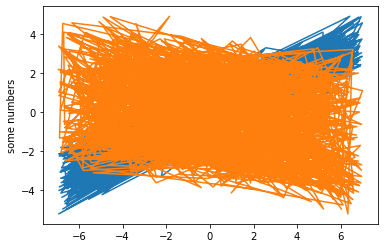

In [7]:
reg.show_plot()

Самый оптимальный выбор гиперпараметров

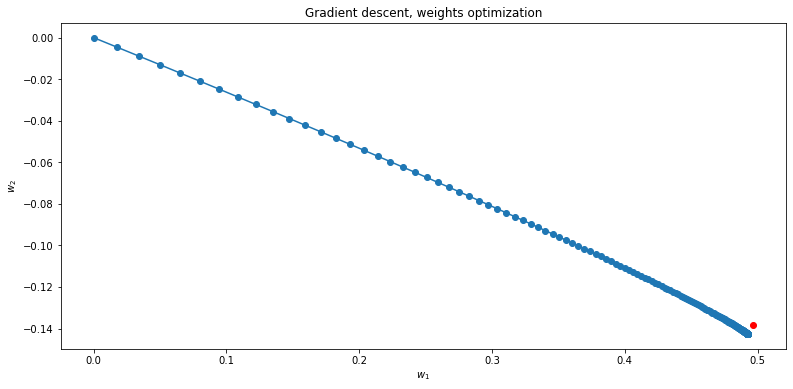

In [8]:
# шаг градиентного спуска
eta = 0.001
# максимальное число итераций
max_iter = 1e4*2
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
reg.gradient_desc(eta, max_iter, min_weight_dist)
reg.w_list_plot()

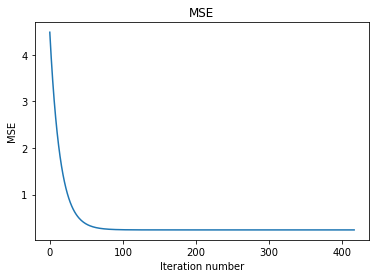

In [9]:
reg.errors_plot()

In [10]:
reg.errors

[4.486809705818035,
 4.197198990098005,
 3.9273469807911314,
 3.6759047730772445,
 3.441615605126324,
 3.223308560397602,
 3.019892700586592,
 2.830351599757531,
 2.653738252215759,
 2.4891703285524995,
 2.3358257560446214,
 2.192938601221834,
 2.0597952339322614,
 1.9357307536516535,
 1.8201256600992832,
 1.712402751450876,
 1.6120242345823677,
 1.5184890328433156,
 1.4313302778511656,
 1.3501129727216459,
 1.2744318150117795,
 1.203909168453953,
 1.138193173306757,
 1.076955985844308,
 1.019892138154168,
 0.9667170100180578,
 0.917165405212216,
 0.8709902250884135,
 0.8279612327850202,
 0.7878639018723441,
 0.7504983436602712,
 0.7156783077910012,
 0.6832302511074174,
 0.6529924701302345,
 0.6248142927962217,
 0.5985553254071273,
 0.5740847510158739,
 0.551280675734662,
 0.5300295196899698,
 0.5102254495733732,
 0.49176984994572087,
 0.47457083064654865,
 0.4585427678416528,
 0.44360587641041893,
 0.42968581153162616,
 0.4167132974728152,
 0.4046237817246966,
 0.3933571127491124,
 0.